# Descision Tree With GridSearch (4 hyperparameter)

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [198]:
data = pd.read_csv('Heart Attack.csv')  
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [199]:
data.isnull().sum()


age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [200]:
data = data.drop(['gender'], axis=1)

In [201]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

923
396
923
396


In [202]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [203]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8],
    'min_samples_split': [2, 3, 8],
    'min_samples_leaf': [1, 4, 8]
}

In [204]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 3, 8]},
             scoring='accuracy')

In [205]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [206]:
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [207]:
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [208]:
print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Accuracy on Test Data: 0.98


In [209]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("heart_attack_2_decision_tree.png")

True

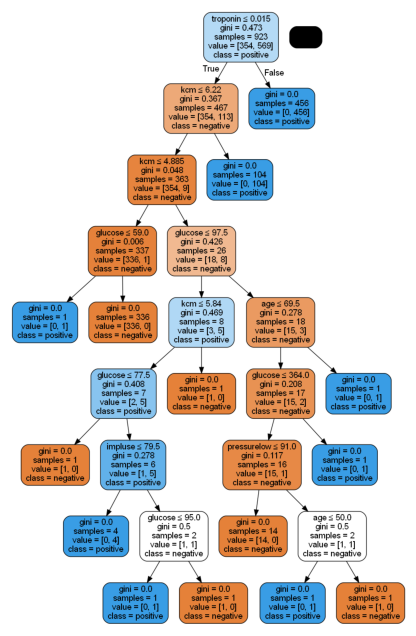

In [210]:
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("heart_attack_2_decision_tree.png"))
plt.axis('off')
plt.show()